In [1]:
from sklearn import datasets
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt 

In [5]:
iris = datasets.load_iris()

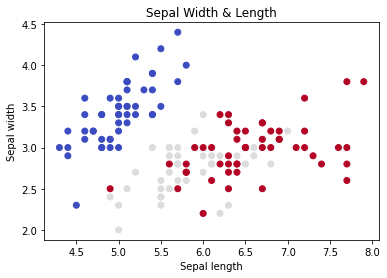

In [6]:
X = iris.data[:, :2]
y = iris.target
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Sepal Width & Length')
plt.show() 

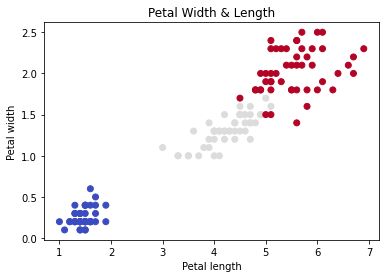

In [7]:
X = iris.data[:, 2:]
y = iris.target
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Petal Width & Length')
plt.show()

In [8]:
X = iris.data[:, :2]
y = iris.target
C = 1.0

In [9]:
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)


h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
titles = ['SVC with linear kernel','LinearSVC (linear kernel)','SVC with RBF kernel','SVC with polynomial (degree 3) kernel']

/home/shashank/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


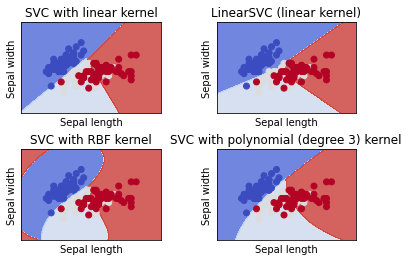

In [11]:
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
     plt.subplot(2, 2, i + 1)
     plt.subplots_adjust(wspace=0.4, hspace=0.4)
 
     Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
 
     Z = Z.reshape(xx.shape)
     plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
 
     plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
     plt.xlabel('Sepal length')
     plt.ylabel('Sepal width')
     plt.xlim(xx.min(), xx.max())
     plt.ylim(yy.min(), yy.max())
     plt.xticks(())
     plt.yticks(())
     plt.title(titles[i])
 
plt.show()